In [631]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import circlify

In [632]:
custom_colors = ['#11270B', '#140D4F', '#598B2C', '#42CAFD', '#FFA400', '#F5EDF0', '#1C0B19', '#66B3BA']

Colors:

Europe: #140D4F
Africa: #598B2C

#11270B
#42CAFD
#FFA400
#F5EDF0
#1C0B19
#66B3BA
#92140C

## World population by continents

In [633]:
world = pd.read_csv('data/world_population.csv')
world_cp = world.copy()
world_cp.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [634]:
# drop unnecessary columns
world_cp = world_cp.drop(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Area (km²)', 'Density (per km²)', 'Growth Rate'], axis=1)

# lowercase all the columns
world_cp.columns = world_cp.columns.str.lower()

# replace the spaces with underscore
world_cp.columns = world_cp.columns.str.replace(' ', '_')

# rename the columns
world_cp = world_cp.rename(columns={'2022_population': '2022', '2020_population': '2020', '2015_population': '2015', '2010_population': '2010', '2000_population': '2000', '1990_population': '1990', '1980_population': '1980', '1970_population': '1970'})

# reorder the columns
world_cp = world_cp[['continent', '1970','1980', '1990', '2000', '2010', '2015', '2020', '2022']]
world_cp

,continent,1970,1980,1990,2000,2010,2015,2020,2022
0,Asia,10752971,12486631,10694796,19542982,28189672,33753499,38972230,41128771
1,Europe,2324731,2941651,3295066,3182021,2913399,2882481,2866849,2842321
2,Africa,13795915,18739378,25518074,30774621,35856344,39543154,43451666,44903225
3,Oceania,27075,32886,47818,58230,54849,51368,46189,44273
4,Europe,19860,35611,53569,66097,71519,71746,77700,79824
...,...,...,...,...,...,...,...,...,...
229,Oceania,9377,11315,13454,14723,13142,12182,11655,11572
230,Africa,76371,116775,178529,270375,413296,491824,556048,575986
231,Asia,6843607,9204938,13375121,18628700,24743946,28516545,32284046,33696614
232,Africa,4281671,5720438,7686401,9891136,13792086,16248230,18927715,20017675


In [648]:
# group the data by continent and get the sum values
world_cp_continent = world_cp.groupby('continent', as_index = False).sum().reset_index(drop=True)
world_cp_continent

,continent,1970,1980,1990,2000,2010,2015,2020,2022
0,Africa,365444348,481536377,638150629,818946032,1055228072,1201102442,1360671810,1426730932
1,Asia,2144906290,2635334228,3210563577,3735089604,4220041327,4458250182,4663086535,4721383274
2,Europe,655923991,692527159,720320797,726093423,735613934,741535608,745792196,743147538
3,North America,315434606,368293361,421266425,486069584,542720651,570383850,594236593,600296136
4,Oceania,19480270,22920240,26743822,31222778,37102764,40403283,43933426,45038554
5,South America,192947156,241789006,297146415,349634282,393078250,413134396,431530043,436816608


### Line Graph

In [690]:
import plotly.graph_objects as go

# define the variables
title = 'Population Growth by Continent'
labels = world_cp_continent['continent'].unique().tolist()
colors = ['#11270B', '#140D4F', '#598B2C', '#1C0B19', '#66B3BA', '#92140C']

In [691]:
mode_size = [4, 4, 4, 4, 4, 4]
line_size = [2, 2, 2, 2, 2, 2]

# filter out non-numeric column names and convert to integers
x_data = world_cp_continent.columns[1:][world_cp_continent.columns[1:].str.isnumeric()].astype(int)


y_data = np.array(world_cp_continent.drop(columns='continent').values.tolist())

In [693]:
fig = go.Figure()
for i in range(len(labels)):
    fig.add_trace(go.Scatter(x=x_data, y=y_data[i], mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True
    ))

    # endpoints
    fig.add_trace(go.Scatter(
        x=[x_data[0], x_data[-1]],
        y=[y_data[i][0], y_data[i][-1]],
        mode='markers',
        marker=dict(color=colors[i], size=mode_size[i])
    ))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Helvetica',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=100,
        t=110,
    ),
    showlegend=True,
    plot_bgcolor='white'
)

annotations = []

# adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # left side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {}M'.format(y_trace[0] // 100000000),
                                  font=dict(family='Helvetica', size=10),
                                  showarrow=True,
                                  showlegend=False))
    # right side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[-1],
                                  xanchor='left', yanchor='middle',
                                  text='{}M'.format(y_trace[-1] // 100000000),
                                  font=dict(family='Helvetica', size=12),
                                  showarrow=False, 
                                  showlegend=False))

# add title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=title,
                              font=dict(family='Helvetica', size=20),
                              showarrow=False))

# add source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='left', yanchor='top',
                              text='Source: https://population.un.org/dataportal/',
                              font=dict(family='Helvetica', size=8),
                              showarrow=False))
# add legend
# annotations.append(
#         dict(
#             xref='paper',
#             yref='paper',
#             x=1.02,  # Adjust position as needed
#             y=1 - labels.index(label) * 0.05,  # Adjust position as needed
#             xanchor='left',
#             yanchor='middle',
#             text=label,
#             font=dict(family='Helvetica', size=12, color=color),  # Match color with trace
#             showarrow=False
#         )
#     )

fig.update_layout(annotations=annotations)

fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.layout.Annotation: 'showlegend'

Did you mean "showarrow"?

    Valid properties:
        align
            Sets the horizontal alignment of the `text` within the
            box. Has an effect only if `text` spans two or more
            lines (i.e. `text` contains one or more <br> HTML tags)
            or if an explicit width is set to override the text
            width.
        arrowcolor
            Sets the color of the annotation arrow.
        arrowhead
            Sets the end annotation arrow head style.
        arrowside
            Sets the annotation arrow head position.
        arrowsize
            Sets the size of the end annotation arrow head,
            relative to `arrowwidth`. A value of 1 (default) gives
            a head about 3x as wide as the line.
        arrowwidth
            Sets the width (in px) of annotation arrow line.
        ax
            Sets the x component of the arrow tail about the arrow
            head. If `axref` is `pixel`, a positive (negative)
            component corresponds to an arrow pointing from right
            to left (left to right). If `axref` is not `pixel` and
            is exactly the same as `xref`, this is an absolute
            value on that axis, like `x`, specified in the same
            coordinates as `xref`.
        axref
            Indicates in what coordinates the tail of the
            annotation (ax,ay) is specified. If set to a x axis id
            (e.g. "x" or "x2"), the `x` position refers to a x
            coordinate. If set to "paper", the `x` position refers
            to the distance from the left of the plotting area in
            normalized coordinates where 0 (1) corresponds to the
            left (right). If set to a x axis ID followed by
            "domain" (separated by a space), the position behaves
            like for "paper", but refers to the distance in
            fractions of the domain length from the left of the
            domain of that axis: e.g., *x2 domain* refers to the
            domain of the second x  axis and a x position of 0.5
            refers to the point between the left and the right of
            the domain of the second x axis. In order for absolute
            positioning of the arrow to work, "axref" must be
            exactly the same as "xref", otherwise "axref" will
            revert to "pixel" (explained next). For relative
            positioning, "axref" can be set to "pixel", in which
            case the "ax" value is specified in pixels relative to
            "x". Absolute positioning is useful for trendline
            annotations which should continue to indicate the
            correct trend when zoomed. Relative positioning is
            useful for specifying the text offset for an annotated
            point.
        ay
            Sets the y component of the arrow tail about the arrow
            head. If `ayref` is `pixel`, a positive (negative)
            component corresponds to an arrow pointing from bottom
            to top (top to bottom). If `ayref` is not `pixel` and
            is exactly the same as `yref`, this is an absolute
            value on that axis, like `y`, specified in the same
            coordinates as `yref`.
        ayref
            Indicates in what coordinates the tail of the
            annotation (ax,ay) is specified. If set to a y axis id
            (e.g. "y" or "y2"), the `y` position refers to a y
            coordinate. If set to "paper", the `y` position refers
            to the distance from the bottom of the plotting area in
            normalized coordinates where 0 (1) corresponds to the
            bottom (top). If set to a y axis ID followed by
            "domain" (separated by a space), the position behaves
            like for "paper", but refers to the distance in
            fractions of the domain length from the bottom of the
            domain of that axis: e.g., *y2 domain* refers to the
            domain of the second y  axis and a y position of 0.5
            refers to the point between the bottom and the top of
            the domain of the second y axis. In order for absolute
            positioning of the arrow to work, "ayref" must be
            exactly the same as "yref", otherwise "ayref" will
            revert to "pixel" (explained next). For relative
            positioning, "ayref" can be set to "pixel", in which
            case the "ay" value is specified in pixels relative to
            "y". Absolute positioning is useful for trendline
            annotations which should continue to indicate the
            correct trend when zoomed. Relative positioning is
            useful for specifying the text offset for an annotated
            point.
        bgcolor
            Sets the background color of the annotation.
        bordercolor
            Sets the color of the border enclosing the annotation
            `text`.
        borderpad
            Sets the padding (in px) between the `text` and the
            enclosing border.
        borderwidth
            Sets the width (in px) of the border enclosing the
            annotation `text`.
        captureevents
            Determines whether the annotation text box captures
            mouse move and click events, or allows those events to
            pass through to data points in the plot that may be
            behind the annotation. By default `captureevents` is
            False unless `hovertext` is provided. If you use the
            event `plotly_clickannotation` without `hovertext` you
            must explicitly enable `captureevents`.
        clicktoshow
            Makes this annotation respond to clicks on the plot. If
            you click a data point that exactly matches the `x` and
            `y` values of this annotation, and it is hidden
            (visible: false), it will appear. In "onoff" mode, you
            must click the same point again to make it disappear,
            so if you click multiple points, you can show multiple
            annotations. In "onout" mode, a click anywhere else in
            the plot (on another data point or not) will hide this
            annotation. If you need to show/hide this annotation in
            response to different `x` or `y` values, you can set
            `xclick` and/or `yclick`. This is useful for example to
            label the side of a bar. To label markers though,
            `standoff` is preferred over `xclick` and `yclick`.
        font
            Sets the annotation text font.
        height
            Sets an explicit height for the text box. null
            (default) lets the text set the box height. Taller text
            will be clipped.
        hoverlabel
            :class:`plotly.graph_objects.layout.annotation.Hoverlab
            el` instance or dict with compatible properties
        hovertext
            Sets text to appear when hovering over this annotation.
            If omitted or blank, no hover label will appear.
        name
            When used in a template, named items are created in the
            output figure in addition to any items the figure
            already has in this array. You can modify these items
            in the output figure by making your own item with
            `templateitemname` matching this `name` alongside your
            modifications (including `visible: false` or `enabled:
            false` to hide it). Has no effect outside of a
            template.
        opacity
            Sets the opacity of the annotation (text + arrow).
        showarrow
            Determines whether or not the annotation is drawn with
            an arrow. If True, `text` is placed near the arrow's
            tail. If False, `text` lines up with the `x` and `y`
            provided.
        standoff
            Sets a distance, in pixels, to move the end arrowhead
            away from the position it is pointing at, for example
            to point at the edge of a marker independent of zoom.
            Note that this shortens the arrow from the `ax` / `ay`
            vector, in contrast to `xshift` / `yshift` which moves
            everything by this amount.
        startarrowhead
            Sets the start annotation arrow head style.
        startarrowsize
            Sets the size of the start annotation arrow head,
            relative to `arrowwidth`. A value of 1 (default) gives
            a head about 3x as wide as the line.
        startstandoff
            Sets a distance, in pixels, to move the start arrowhead
            away from the position it is pointing at, for example
            to point at the edge of a marker independent of zoom.
            Note that this shortens the arrow from the `ax` / `ay`
            vector, in contrast to `xshift` / `yshift` which moves
            everything by this amount.
        templateitemname
            Used to refer to a named item in this array in the
            template. Named items from the template will be created
            even without a matching item in the input figure, but
            you can modify one by making an item with
            `templateitemname` matching its `name`, alongside your
            modifications (including `visible: false` or `enabled:
            false` to hide it). If there is no template or no
            matching item, this item will be hidden unless you
            explicitly show it with `visible: true`.
        text
            Sets the text associated with this annotation. Plotly
            uses a subset of HTML tags to do things like newline
            (<br>), bold (<b></b>), italics (<i></i>), hyperlinks
            (<a href='...'></a>). Tags <em>, <sup>, <sub> <span>
            are also supported.
        textangle
            Sets the angle at which the `text` is drawn with
            respect to the horizontal.
        valign
            Sets the vertical alignment of the `text` within the
            box. Has an effect only if an explicit height is set to
            override the text height.
        visible
            Determines whether or not this annotation is visible.
        width
            Sets an explicit width for the text box. null (default)
            lets the text set the box width. Wider text will be
            clipped. There is no automatic wrapping; use <br> to
            start a new line.
        x
            Sets the annotation's x position. If the axis `type` is
            "log", then you must take the log of your desired
            range. If the axis `type` is "date", it should be date
            strings, like date data, though Date objects and unix
            milliseconds will be accepted and converted to strings.
            If the axis `type` is "category", it should be numbers,
            using the scale where each category is assigned a
            serial number from zero in the order it appears.
        xanchor
            Sets the text box's horizontal position anchor This
            anchor binds the `x` position to the "left", "center"
            or "right" of the annotation. For example, if `x` is
            set to 1, `xref` to "paper" and `xanchor` to "right"
            then the right-most portion of the annotation lines up
            with the right-most edge of the plotting area. If
            "auto", the anchor is equivalent to "center" for data-
            referenced annotations or if there is an arrow, whereas
            for paper-referenced with no arrow, the anchor picked
            corresponds to the closest side.
        xclick
            Toggle this annotation when clicking a data point whose
            `x` value is `xclick` rather than the annotation's `x`
            value.
        xref
            Sets the annotation's x coordinate axis. If set to a x
            axis id (e.g. "x" or "x2"), the `x` position refers to
            a x coordinate. If set to "paper", the `x` position
            refers to the distance from the left of the plotting
            area in normalized coordinates where 0 (1) corresponds
            to the left (right). If set to a x axis ID followed by
            "domain" (separated by a space), the position behaves
            like for "paper", but refers to the distance in
            fractions of the domain length from the left of the
            domain of that axis: e.g., *x2 domain* refers to the
            domain of the second x  axis and a x position of 0.5
            refers to the point between the left and the right of
            the domain of the second x axis.
        xshift
            Shifts the position of the whole annotation and arrow
            to the right (positive) or left (negative) by this many
            pixels.
        y
            Sets the annotation's y position. If the axis `type` is
            "log", then you must take the log of your desired
            range. If the axis `type` is "date", it should be date
            strings, like date data, though Date objects and unix
            milliseconds will be accepted and converted to strings.
            If the axis `type` is "category", it should be numbers,
            using the scale where each category is assigned a
            serial number from zero in the order it appears.
        yanchor
            Sets the text box's vertical position anchor This
            anchor binds the `y` position to the "top", "middle" or
            "bottom" of the annotation. For example, if `y` is set
            to 1, `yref` to "paper" and `yanchor` to "top" then the
            top-most portion of the annotation lines up with the
            top-most edge of the plotting area. If "auto", the
            anchor is equivalent to "middle" for data-referenced
            annotations or if there is an arrow, whereas for paper-
            referenced with no arrow, the anchor picked corresponds
            to the closest side.
        yclick
            Toggle this annotation when clicking a data point whose
            `y` value is `yclick` rather than the annotation's `y`
            value.
        yref
            Sets the annotation's y coordinate axis. If set to a y
            axis id (e.g. "y" or "y2"), the `y` position refers to
            a y coordinate. If set to "paper", the `y` position
            refers to the distance from the bottom of the plotting
            area in normalized coordinates where 0 (1) corresponds
            to the bottom (top). If set to a y axis ID followed by
            "domain" (separated by a space), the position behaves
            like for "paper", but refers to the distance in
            fractions of the domain length from the bottom of the
            domain of that axis: e.g., *y2 domain* refers to the
            domain of the second y  axis and a y position of 0.5
            refers to the point between the bottom and the top of
            the domain of the second y axis.
        yshift
            Shifts the position of the whole annotation and arrow
            up (positive) or down (negative) by this many pixels.
        
Did you mean "showarrow"?

Bad property path:
showlegend
^^^^^^^^^^

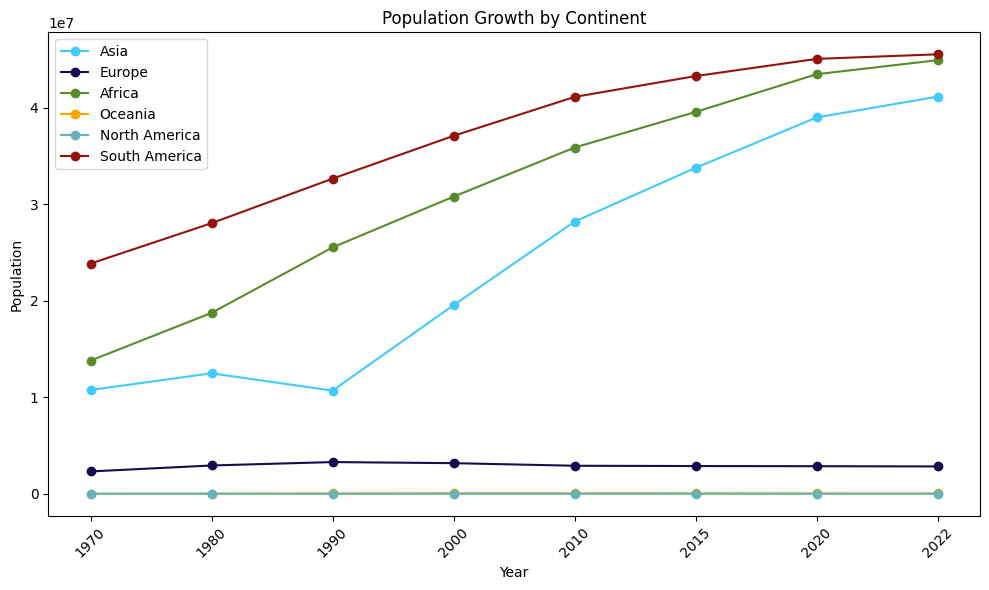

In [688]:
# color dictionary
colors = {'Europe': '#140D4F', 'Africa': '#598B2C', 'Asia': '#42CAFD', 'Oceania': '#FFA400', 'North America': '#66B3BA', 'South America': '#92140C'}

# plot out a line graph
plt.figure(figsize=(10, 6))

for continent in world_cp['continent'].unique():
    df_continent = world_cp[world_cp['continent'] == continent]
    plt.plot(df_continent.columns[1:], df_continent.values[0][1:], marker='o', label=continent, color=colors.get(continent))

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth by Continent')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [609]:
raw_df = pd.read_csv('./data/FAOSTAT_data.csv')
raw_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,88,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,89,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,92,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,93,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,94,E,Estimated value,NaN


Food insecurity:

* Prevalence of severe food insecurity in the total population (percent): 210401 (M/F)
* Prevalence of moderate or severe food insecurity in the total population (percent): 210091 (M/F)
* Number of severely food insecure people (million): 210071 (M/F)
* Number of moderately or severely food insecure people (million): 210081 (M/F)

## Further cleaning and preprocessing

In [610]:
raw_df.columns = raw_df.columns.str.lower()
raw_df.columns = raw_df.columns.str.replace(' ', '_')
# change the area column to country column
raw_df = raw_df.rename(columns={'area': 'country'})

In [611]:
# filter out the data by item code
# prevalence of severe food insecurity in the total population
prev_severe_total = raw_df[raw_df['item_code'] == '210401'] 
prev_severe_male = raw_df[raw_df['item_code'] == '210401M']
prev_sever_female = raw_df[raw_df['item_code'] == '210401F']

# prevalence of moderate or severe food insecurity in the total population
prev_mod_total = raw_df[raw_df['item_code'] == '210091']
prev_mod_male = raw_df[raw_df['item_code'] == '210091M']
prev_mod_female = raw_df[raw_df['item_code'] == '210091F']

In [612]:
prev_severe_total.head()

,domain_code,domain,area_code_(m49),country,element_code,element,item_code,item,year_code,year,unit,value,flag,flag_description,note
140,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20142016,2014-2016,%,14.8,A,Official figure,FAO data
141,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20152017,2015-2017,%,15.1,A,Official figure,FAO data
142,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20162018,2016-2018,%,17.3,A,Official figure,FAO data
143,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20172019,2017-2019,%,17.3,A,Official figure,Official estimate
144,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,210401,Prevalence of severe food insecurity in the to...,20182020,2018-2020,%,19.8,A,Official figure,Official estimate


In [613]:
# read the data
code_df = pd.read_csv('./data/country_annotation.csv')

# drop unnecessary columns
code_df = code_df.drop(columns=['code', 'languages'])

# rename the columns
code_df = code_df.rename(columns={'name':'country'})

code_df.head()

,country,continent
0,United States,North America
1,Dominican Republic,North Americ
2,Canada,North America
3,Honduras,North America
4,Costa Rica,North America


In [614]:
# copy the dataframe
df = prev_severe_total.copy()
# change the value column type to numeric value
df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [615]:
# group by the country and get the sum of all the values
df = df.groupby('country', as_index=False)['value'].sum().reset_index(drop=True)
df.head()

,country,value
0,Afghanistan,135.3
1,Albania,65.5
2,Algeria,65.1
3,American Samoa,0.0
4,Andorra,0.0


In [616]:
# merge the region data with the main data
df = pd.merge(df, code_df, on='country', how='left')

In [617]:
# drop the rows with value 0
df = df[df['value'] != 0].reset_index(drop=True)
df

,country,value,continent
0,Afghanistan,135.3,Asia
1,Albania,65.5,Europe
2,Algeria,65.1,Africa
3,Angola,133.5,Africa
4,Antigua and Barbuda,14.2,NaN
...,...,...,...
141,Vanuatu,9.6,Oceania
142,Viet Nam,2.3,NaN
143,Yemen,80.4,Asia
144,Zambia,189.4,Africa


In [618]:
# dictionary mapping each country to its continent
country_to_continent = {
    'Antigua and Barbuda': 'North America',
    'Bahamas': 'North America',
    'Barbados': 'North America',
    'Belize': 'North America',
    'Cabo Verde': 'Africa',
    'Congo': 'Africa',
    'Czechia': 'Europe',
    'Côte d\'Ivoire': 'Africa',
    'Eswatini': 'Africa',
    'Grenada': 'North America',
    'Haiti': 'North America',
    'Iran (Islamic Republic of)': 'Asia',
    'Jamaica': 'North America',
    'Lao People\'s Democratic Republic': 'Asia',
    'Myanmar': 'Asia',
    'Netherlands (Kingdom of the)': 'Europe',
    'Republic of Korea': 'Asia',
    'Republic of Moldova': 'Europe',
    'Russian Federation': 'Europe',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Sao Tome and Principe': 'Africa',
    'Trinidad and Tobago': 'North America',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'United Republic of Tanzania': 'Africa',
    'United States of America': 'North America',
    'Viet Nam': 'Asia'
}

# map the country to the continent
df['continent'] = df['continent'].fillna(df['country'].map(country_to_continent))

df

,country,value,continent
0,Afghanistan,135.3,Asia
1,Albania,65.5,Europe
2,Algeria,65.1,Africa
3,Angola,133.5,Africa
4,Antigua and Barbuda,14.2,North America
...,...,...,...
141,Vanuatu,9.6,Oceania
142,Viet Nam,2.3,Asia
143,Yemen,80.4,Asia
144,Zambia,189.4,Africa


In [619]:
# data sanity check
# check the continent value
df.continent.unique()

# replace the incorrect value
df['continent'] = df['continent'].str.replace('North Americ', 'North America')
df['continent'] = df['continent'].str.replace('North Americaa', 'North America')

In [620]:
df

,country,value,continent
0,Afghanistan,135.3,Asia
1,Albania,65.5,Europe
2,Algeria,65.1,Africa
3,Angola,133.5,Africa
4,Antigua and Barbuda,14.2,North America
...,...,...,...
141,Vanuatu,9.6,Oceania
142,Viet Nam,2.3,Asia
143,Yemen,80.4,Asia
144,Zambia,189.4,Africa


## Data Visualiztion: Prevalence of severe food insecurity in the total population

### Nested pie chart

In [621]:
# plot a nested pie chart using plotly
fig = px.sunburst(df, path=['continent', 'country'], values='value', names = 'country', title='Prevalence of severe food insecurity in the total population',color_discrete_sequence=custom_colors)
# change the plot size
fig.update_layout(width=800, height=800)
fig.show()

### Packed Bubble chart

In [622]:
# group the df by continent and aggregate the data
grouped_df = df.groupby('continent').apply(lambda x: x[['country', 'value']].to_dict(orient='records')).reset_index(name='data')

# convert the grouped DataFrame to a dictionary
result_dict = grouped_df.set_index('continent').to_dict(orient='index')

print(result_dict)

{'Africa': {'data': [{'country': 'Algeria', 'value': 65.1}, {'country': 'Angola', 'value': 133.5}, {'country': 'Benin', 'value': 95.0}, {'country': 'Botswana', 'value': 161.6}, {'country': 'Burkina Faso', 'value': 100.3}, {'country': 'Cabo Verde', 'value': 38.5}, {'country': 'Cameroon', 'value': 185.9}, {'country': 'Central African Republic', 'value': 185.39999999999998}, {'country': 'Comoros', 'value': 54.8}, {'country': 'Congo', 'value': 355.5}, {'country': "Côte d'Ivoire", 'value': 59.5}, {'country': 'Democratic Republic of the Congo', 'value': 118.4}, {'country': 'Djibouti', 'value': 33.0}, {'country': 'Egypt', 'value': 55.7}, {'country': 'Eswatini', 'value': 36.6}, {'country': 'Ethiopia', 'value': 115.5}, {'country': 'Gambia', 'value': 151.6}, {'country': 'Ghana', 'value': 42.0}, {'country': 'Guinea', 'value': 338.9}, {'country': 'Guinea-Bissau', 'value': 103.0}, {'country': 'Kenya', 'value': 156.8}, {'country': 'Lesotho', 'value': 119.69999999999999}, {'country': 'Liberia', 'valu

/var/folders/27/cc8xpbnj4vgc0f2m9xmmtc_r0000gn/T/ipykernel_45541/2385084736.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



---

In [623]:
# load the data
cleaned_df = pd.read_csv('./data/CleanedData/foodinsecuritybygender.csv', encoding='ISO-8859-1')
# convert it to dataframe
cleaned_df = pd.DataFrame(cleaned_df)
cleaned_df.head()

,Unnamed: 0,Area,Region,YearPeriod,PrimaryColonizer,AVG_PercentFemale,AVG_PercentMale
0,1,Albania,Europe,Y20002002,NaN,NaN,NaN
1,2,Albania,Europe,Y20012003,NaN,NaN,NaN
2,3,Albania,Europe,Y20022004,NaN,NaN,NaN
3,4,Albania,Europe,Y20032005,NaN,NaN,NaN
4,5,Albania,Europe,Y20042006,NaN,NaN,NaN


In [624]:
# fill the null values with 0
cleaned_df['AVG_PercentFemale']= cleaned_df['AVG_PercentFemale'].fillna(0)
cleaned_df['AVG_PercentMale']= cleaned_df['AVG_PercentMale'].fillna(0)

# convert the data type to numeric
cleaned_df['AVG_PercentFemale'] = pd.to_numeric(cleaned_df['AVG_PercentFemale'], errors='coerce')
cleaned_df['AVG_PercentMale'] = pd.to_numeric(cleaned_df['AVG_PercentMale'], errors='coerce')

# add a new boolean column if the primarycolonizer column is not null
cleaned_df['colonizer'] = cleaned_df['PrimaryColonizer'].notnull()

cleaned_df

,Unnamed: 0,Area,Region,YearPeriod,PrimaryColonizer,AVG_PercentFemale,AVG_PercentMale,colonizer
0,1,Albania,Europe,Y20002002,NaN,0.0,0.0,False
1,2,Albania,Europe,Y20012003,NaN,0.0,0.0,False
2,3,Albania,Europe,Y20022004,NaN,0.0,0.0,False
3,4,Albania,Europe,Y20032005,NaN,0.0,0.0,False
4,5,Albania,Europe,Y20042006,NaN,0.0,0.0,False
...,...,...,...,...,...,...,...,...
1969,1970,Zimbabwe,Africa,Y20162018,United Kingdom of Great Britain and Northern I...,37.1,34.6,True
1970,1971,Zimbabwe,Africa,Y20172019,United Kingdom of Great Britain and Northern I...,35.8,32.5,True
1971,1972,Zimbabwe,Africa,Y20182020,United Kingdom of Great Britain and Northern I...,33.7,30.6,True
1972,1973,Zimbabwe,Africa,Y20192021,United Kingdom of Great Britain and Northern I...,33.1,29.6,True


In [625]:
# drop the year column
another_df = cleaned_df.drop(columns=['YearPeriod', 'Unnamed: 0', 'PrimaryColonizer', 'colonizer'])
# group by the country and get the sum of all the values
another_df = another_df.groupby(['Area', 'Region'], as_index=False).sum().reset_index(drop=True)
another_df.head()

,Area,Region,AVG_PercentFemale,AVG_PercentMale
0,Albania,Europe,73.8,57.2
1,Algeria,Africa,67.5,62.9
2,Andorra,Europe,0.0,0.0
3,Angola,Africa,139.6,127.7
4,Austria,Europe,8.5,8.1


In [626]:
# group by region again
region_sum = another_df.groupby('Region').agg({'AVG_PercentFemale': 'sum', 'AVG_PercentMale': 'sum'}).reset_index()
region_sum

,Region,AVG_PercentFemale,AVG_PercentMale
0,Africa,6061.9,5860.8
1,Europe,520.5,492.7


In [627]:
# merge the sum with the original DataFrame based on 'Region'
df_merged = another_df.merge(region_sum, on='Region', suffixes=('', '_Sum'))
# change the column name
df_merged = df_merged.rename(columns={'AVG_PercentFemale_Sum': 'Continent_Sum_Female', 'AVG_PercentMale_Sum': 'Continent_Sum_Male'})
df_merged

,Area,Region,AVG_PercentFemale,AVG_PercentMale,Continent_Sum_Female,Continent_Sum_Male
0,Albania,Europe,73.8,57.2,520.5,492.7
1,Algeria,Africa,67.5,62.9,6061.9,5860.8
2,Andorra,Europe,0.0,0.0,520.5,492.7
3,Angola,Africa,139.6,127.7,6061.9,5860.8
4,Austria,Europe,8.5,8.1,520.5,492.7
...,...,...,...,...,...,...
89,Ukraine,Europe,18.6,16.9,520.5,492.7
90,United Kingdom of Great Britain and Northern I...,Europe,11.6,9.4,520.5,492.7
91,United Republic of Tanzania,Africa,177.6,167.6,6061.9,5860.8
92,Zambia,Africa,189.1,189.6,6061.9,5860.8


In [628]:
# change the dataframe to dictionary
df2 = df_merged.groupby('Region')
# initialize the dictionary
data = []

# iterate over each group
for region, group in df2:
    children = []
    # iterate over each row in the group
    for _, row in group.iterrows():
        children.append({
            'id': row['Area'],
            'datum': {'AVG_PercentFemale': row['AVG_PercentFemale'], 'AVG_PercentMale': row['AVG_PercentMale']}
        })
    # append region and its children to the data dictionary
    data.append({'id': region, 'datum': group['AVG_PercentFemale'].sum(), 'children': children})

print(data)

[{'id': 'Africa', 'datum': 6061.900000000001, 'children': [{'id': 'Algeria', 'datum': {'AVG_PercentFemale': 67.5, 'AVG_PercentMale': 62.900000000000006}}, {'id': 'Angola', 'datum': {'AVG_PercentFemale': 139.60000000000002, 'AVG_PercentMale': 127.7}}, {'id': 'Benin', 'datum': {'AVG_PercentFemale': 97.39999999999999, 'AVG_PercentMale': 92.7}}, {'id': 'Botswana', 'datum': {'AVG_PercentFemale': 179.9, 'AVG_PercentMale': 143.6}}, {'id': 'Burkina Faso', 'datum': {'AVG_PercentFemale': 93.0, 'AVG_PercentMale': 108.0}}, {'id': 'Burundi', 'datum': {'AVG_PercentFemale': 0.0, 'AVG_PercentMale': 0.0}}, {'id': 'Cabo Verde', 'datum': {'AVG_PercentFemale': 38.5, 'AVG_PercentMale': 38.5}}, {'id': 'Cameroon', 'datum': {'AVG_PercentFemale': 178.0, 'AVG_PercentMale': 193.7}}, {'id': 'Central African Republic', 'datum': {'AVG_PercentFemale': 185.39999999999998, 'AVG_PercentMale': 185.39999999999998}}, {'id': 'Chad', 'datum': {'AVG_PercentFemale': 0.0, 'AVG_PercentMale': 0.0}}, {'id': 'Comoros', 'datum': {'

In [629]:
circles = circlify.circlify(
    data,
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

TypeError: unsupported operand type(s) for +: 'dict' and 'int'

In [600]:


# create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14, 14))

# title
ax.set_title('Repartition of the world population')

# remove axes
ax.axis('off')

# find axis boundaries
lim = max(
    max(
        circle['x'] + circle['r'],
        circle['y'] + circle['r'],
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# print circle the highest level (continents):
for circle in circles:
    if circle['level'] != 2:
        continue
    x, y, r = circle['x'], circle['y'], circle['r']
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                 linewidth=2, color="lightblue"))

# print circle and labels for the highest level:
for circle in circles:
    if circle['level'] != 3:
        continue
    x, y, r = circle['x'], circle['y'], circle['r']
    label = circle['ex']["id"]
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                 linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x, y), ha='center', color="white")

# print labels for the continents
for circle in circles:
    if circle['level'] != 2:
        continue
    x, y, _ = circle['x'], circle['y'], circle['r']
    label = circle['ex']["id"]
    plt.annotate(label, (x, y), va='center', ha='center', bbox=dict(
        facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

TypeError: unsupported operand type(s) for +: 'dict' and 'int'

Colors:

Europe: #140D4F
Africa: #598B2C

#11270B
#42CAFD
#FFA400
#F5EDF0
#1C0B19
#66B3BA
#92140C

In [526]:
colors = ['#11270B', '#42CAFD', '#FFA400', '#F5EDF0', '#1C0B19', '#66B3BA', '#92140C']

data_dict = {
    'Area': another_df['Area'].tolist(),
    'AVG_PercentFemale': another_df['AVG_PercentFemale'].tolist(),
    'AVG_PercentMale': another_df['AVG_PercentMale'].tolist(),
    'color': colors[:len(another_df)]  # Selecting colors based on the length of the DataFrame
}

In [527]:
#| vscode: {languageId: python}
# browser_market_share = {
#     'browsers': ['firefox', 'chrome', 'safari', 'edge', 'ie', 'opera'],
#     'market_share': [8.61, 69.55, 8.36, 4.12, 2.76, 2.43],
#     'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00']
# }

# colors = {'color': ['#11270B', '#42CAFD', '#FFA400', '#F5EDF0', '#1C0B19', '#66B3BA', '#92140C']}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=data_dict['AVG_PercentFemale'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(ax, data_dict['Area'], colors)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Food Insecurity')

plt.show()

IndexError: list index out of range

Error in callback <function flush_figures at 0x336e300e0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 